# Inventory optimization

In [1]:
import numpy as np
from scipy import linalg
from matplotlib import cm 
from matplotlib import pyplot as plt

Objective function
1. $D$ demand
2. $C_0$ cost by order
3. $C_c$ cost for carrying
4. $Q$ order size
5. $TC$ total cost
\begin{equation}
TC( Q ) = \frac{D}{Q} C_0 + \frac{Q}{2} C_c
\end{equation}
the optimal value is computed by solving $\frac{d TC}{d Q}(Q) = 0$
\begin{equation}
Q = \sqrt{ \frac{2 D C_0}{C_c} }
\end{equation}

In [2]:
D = 1000
C0 = 20
Cc = 1

def tot_cost( Q ) :
  return ( D / Q ) * C0 + 0.5 * Q * Cc

Q = np.sqrt( 2 * D * C0 / Cc )
n = D / Q
print( "Number of orders", n )
print( "Optimal order size", Q )
print( "Total cost", tot_cost( Q ) )

Number of orders 5.0
Optimal order size 200.0
Total cost 200.0


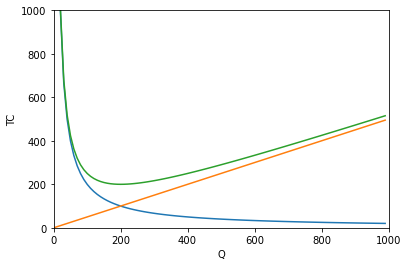

In [3]:
q = np.arange( 0.1, 1000, 10 )
OC = [ ( D / q ) * C0 for q in q ]
CC = [ 0.5 * q * Cc for q in q ]
TC = [ tot_cost( q ) for q in q ]

plt.xlabel( 'Q' )
plt.ylabel( 'TC' )
plt.xlim( 0, 1e3 )
plt.ylim( 0, 1e3 )
plt.plot( q, OC )
plt.plot( q, CC )
plt.plot( q, TC )

Objective function
1. $D$ demand
2. $C_0$ cost by order
3. $C_c$ cost for carrying
4. $C_s$ cost 
5. $Q$ order size
6. $s$
7. $TC$ total cost
\begin{equation}
TC( Q, s ) = \frac{D}{Q} C_0 + \frac{(Q-s)^2}{2Q} C_c + \frac{s^2}{2Q} C_s
\end{equation}
the optimal value is computed by solving $\frac{\partial TC}{\partial Q}(Q,s) = 0,\frac{\partial TC}{\partial s}(Q,s) = 0$
\begin{equation}
Q = \sqrt{ \frac{2 D C_0( C_c + C_s )}{C_c C_s} },\qquad
s = \frac{QC_c}{C_c + C_s}
\end{equation}

In [4]:
D = 1000
C0 = 0.7
Cc = 0.2
Cs = 0.4

def tot_cost( Q, s ) :
  return ( D / Q ) * C0 + 0.5 * ( ( Q - s )**2 ) * Cc / Q + 0.5 * ( s**2 ) * Cs / Q

Q = np.sqrt( 2 * D * C0 * ( Cc + Cs ) / ( Cc * Cs ) )
s = ( Q * Cc ) / ( Cc + Cs )
n = D / Q

print( "Number of orders", n )
print( "Optimal order size", Q )
print( "Optimal order size", s )
print( "Total cost", tot_cost( Q, s ) )

Number of orders 9.759000729485331
Optimal order size 102.46950765959599
Optimal order size 34.15650255319866
Total cost 13.662601021279464


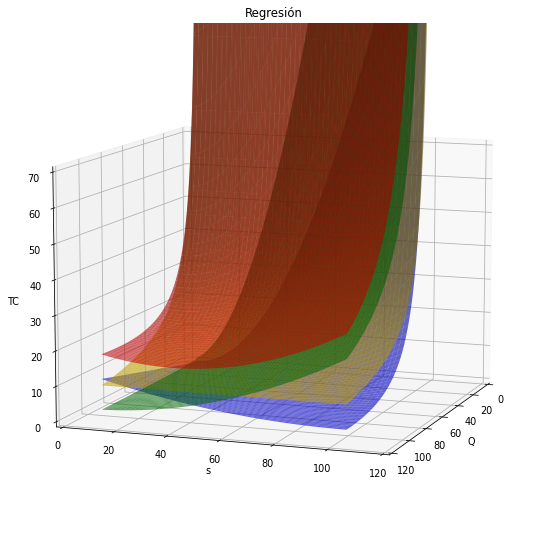

In [5]:
[ Qg, sg ] = np.meshgrid( np.arange( 5, 100, 1 ), np.arange( 5, 100, 1 ) );

OC = np.zeros( Qg.shape )
CC = np.zeros( Qg.shape )
SC = np.zeros( Qg.shape )
TC = np.zeros( Qg.shape )
for i in range( 0, Qg.shape[0] ) :
  for j in range( 0, Qg.shape[1] ) :
    TC[i,j] = tot_cost( Qg[i,j], sg[i,j] )
    OC[i,j] = ( D / Qg[i,j] ) * C0
    CC[i,j] = ( ( ( Qg[i,j] - sg[i,j] )**2 ) / ( 2 * Qg[i,j] ) ) * Cc
    SC[i,j] = ( ( sg[i,j]**2 ) / ( 2 * Qg[i,j] ) ) * Cs
    
fig = plt.figure( figsize = ( 20, 10 ), dpi = 70, facecolor = 'w', edgecolor = 'k' )
ax = fig.add_subplot( 111, projection = '3d' )
ax.plot_surface( Qg, sg, TC, color = 'red', alpha = 0.6 )
ax.plot_surface( Qg, sg, OC, color = 'gold', alpha = 0.6 )
ax.plot_surface( Qg, sg, CC, color = 'blue', alpha = 0.6 )
ax.plot_surface( Qg, sg, SC, color = 'green', alpha = 0.6 )
ax.set( xlabel = 'Q', ylabel = 's', zlabel = 'TC', title = 'Regresión')
ax.view_init( 10, 20 )
ax.set_zlim3d( 0, 70 )   
ax.set_ylim3d( 0, 120 )   
ax.set_xlim3d( 0, 120 )
plt.show()
